In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize']=(10,4)

In [10]:
iris = load_iris()

In [11]:
target_names = iris['target_names']
target = iris['target']

In [17]:
features = pd.DataFrame(iris['data'],columns=iris['feature_names'])

In [18]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
from sklearn.decomposition import PCA


In [20]:
model = PCA(n_components =2)

In [22]:
model.fit(features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
model.explained_variance_

array([4.22484077, 0.24224357])

In [24]:
model.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [25]:
data = model.transform(features)

In [26]:
data = pd.DataFrame(data,columns=['one','two'])

In [27]:
data.head()

,one,two
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


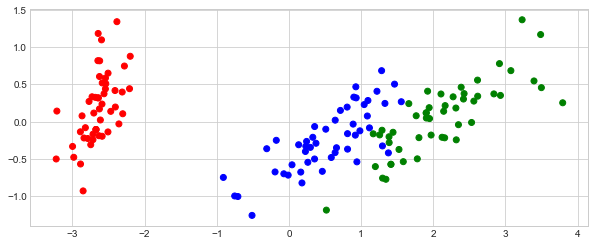

In [38]:
color = pd.Series(target).map({0:'red',1:'blue',2:'green'})
color[:5]

plt.scatter(data['one'],data['two'],c=color)
plt.show()

In [29]:
model.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [41]:
model = KNeighborsClassifier(n_neighbors=7)

In [42]:


model.fit(data,target)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [43]:


model.predict([[5.5,2.5]])



array([2])

In [44]:
y_pred  = model.predict(data)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [46]:
confusion_matrix(target,y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [47]:


accuracy_score(target,y_pred)



0.98

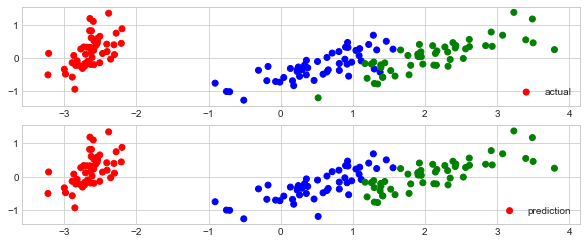

In [48]:
p_color = pd.Series(y_pred).map({0:'red',1:'blue',2:'green'})
fig,(ax1,ax2)  = plt.subplots(nrows=2)
ax1.scatter(data['one'],data['two'],c = color,label="actual")
ax2.scatter(data['one'],data['two'],c=p_color,label="prediction")
ax1.legend()
ax2.legend()
plt.show()
